In [2]:
# importing necessary packages for ease of use

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [3]:
# We use the MNIST dataset in the identification of text in an image
# MNIST consists of greyscale handwritten digits; each image is 28x28 pixels
# The goal is to build an NN to take any image and predict the digit in the image

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])

# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# we can use the trainloader object in a for loop ::: for image, label in trainloader:
#                                                         do things with images and labels
# batch size is the number of images we get in one iteration from the data loader
# shuffle tells it to shuffle the dataset every time


In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


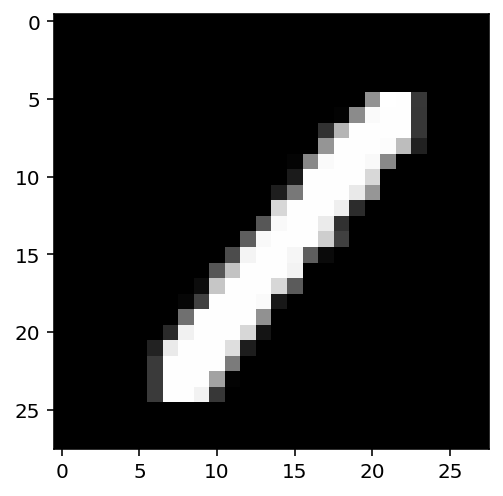

In [12]:
# we can see how an image looks like
plt.imshow(images[63].numpy().squeeze(), cmap='Greys_r')

In [18]:
def activation(x):
    return 1/(1+torch.exp(-x))

# Flattening the input images
print(images.shape[0])
# images.shape[0] gives us the batch size i.e 64 since images.shape => (64, 1, 28, 28)
# the -1 automatically calculates from the remaining 3 and gives us 784
inputs = images.view(images.shape[0], -1)
print(inputs.shape)

# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1)+b1)

out = torch.mm(h, w2) + b2
print(out.shape)
print(out)

64
torch.Size([64, 784])
torch.Size([64, 10])
tensor([[ -9.9304,  -8.9026,  -7.8685,  -8.0275,  14.5250, -10.3544,   2.8135,
           3.8199,   2.4485,  29.7391],
        [ -1.8869,  -8.3896, -10.6447,  -6.1789,  15.0291,  -7.1249,  -5.3183,
           4.6844,  17.9743,  39.3664],
        [-12.2305,   2.7640, -13.8526,  -2.3625,   9.4439, -11.5218,  -6.0000,
           7.6535,  -1.9586,  33.6608],
        [ -4.0201,   9.6818, -14.8365,  -6.0659,  11.1650,  -1.8317,  -5.1201,
           3.3262,   2.9449,  17.3303],
        [ -7.7954,   4.4435,  -8.9281,  -0.6301,   6.7177,  -5.3472,   7.5762,
           0.6441,  13.0231,  34.0304],
        [ -2.7910,   8.1767,  -6.5630,  -8.8419,  14.6394,  -5.2926,  -2.1668,
           6.5178,   3.9193,  30.3003],
        [ -8.3011,  -4.6067, -14.4057,  -9.6481,  12.4834,  -3.8495,  -1.0988,
           3.9186,   2.7033,  23.5413],
        [ -7.3268,   2.1940, -13.7532,   1.8120,   5.6704,  -9.2766,  -2.3345,
           6.2758,  21.4571,  30.2368],
  

In [20]:
# We now need the prob from the above that it belongs to one of the certain classes
# To do so, we use Softmax function
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

probabilities = softmax(out)

# Checking it has the right shape of (64,10)
print(probabilities.shape)

torch.Size([64, 10])


In [21]:
####### Building Networks easily with the PyTorch nn module
from torch import nn

In [23]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()        # Pytorch uses this to recognize what the network has
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer that has 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define the sigmoid activation and softmax function
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x
    
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [24]:
import torch.nn.functional as F
class NetworkF(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer transformation
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
        
    def forward(self, x):
        # Hidden layer with sigmoid activation; typically ReLu is what is used today due to speed and efficiency
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax function
        x = F.softmax(self.output(x), dim=1)
        
        return x
    
modelF = NetworkF()
modelF

NetworkF(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)